This is a Python implementation of MATLAB demo code provided by the course *Monte Carlo Methods in Finance* provided by iversity.org

https://iversity.org/my/courses/monte-carlo-methods-in-finance/


# Week 3

#### demoCode_linearCongruentialGenerator: linear congrential maps to generate U[0,1] pseudorandom numbers -- Lecture 3.1

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

A poor Linear Congrential Generator (pseudo-random number generator)

In [2]:
# Pseudo-random number generator
def linearCongruentialRand(N,a,c,m,k):
    """A Linear Congruential Pseudo-Random Number Generator.
    
    Generates a sequence of apparent randum numbers in the interval [0,1] using the LCG method.
    
    INPUT:
        N : Number of U[0,1] samples to generate
        a : Multiplier
        c : Increment
        m : Modulus
        k : Seed of the generator        

    OUTPUT:
        U : row vector with N samples from U[0,1]     
    """
    U = np.zeros((N,))
    U[0] = k / m
    for n in range(2, N):
        k = np.mod(a*k+c, m)
        U[n] = k / m
    return U

In [3]:
# A function to plot our results
# it uses three consecutive values in the series as the (x,y,z) coordinate
def plotResults(U, ax=None):
    """A wrapper for making 3D scatter plots of the random numbers. 
    
    The (x, y, z) values of each plotpoint corresponds to three consecutive values of the row vector U.
    
    For the poor LCG it reveals a pattern -- a correlation among the 'random' numbers.
    
    INPUT:
        U : a row vector of 'random' numbers on the interval.
        ax (optional) : an Axes3D object in which the figure is plotted. 
        If no object is provided the function initializes one

    OUTPUT:
        ax : an Axes3D object which can be used to set properties of the figure such as titles and axes labels.
    """
    
    if ax is None:
        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(111, projection='3d')
    ax.scatter(U[:-2:3], U[1:-1:3], U[2::3], s=1)
    ax.view_init(15, 54.5) # this is the angle (in degrees) at which the plot is viewed (elevation and azimuth respectively)
    # the angles required some finetuning to visualize the pattern of the pseudo random numbers
    return ax


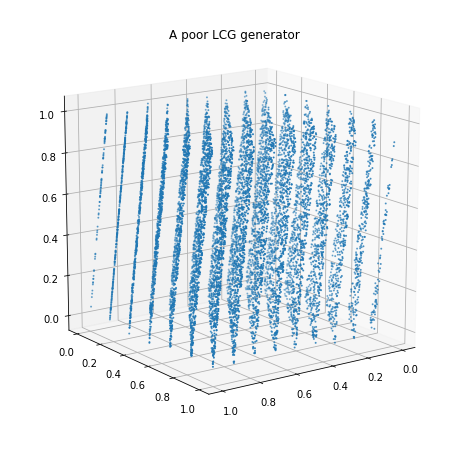

In [4]:
m = 2**31 # generate integers in  the range 0..(m-1)
a = 65539 # multiplier
c = 0     # increment

k = 1969  # seed
N = 30000 # number of samples

# generate N samples U[0,1]
U = linearCongruentialRand(N,a,c,m,k)

# plot the random numbers in the unit cube
ax = plotResults(U)
ax.set_title('A poor LCG generator');
plt.show()

For this set of special parameters the consecutive random numbers shows a clear correlation. A clear pattern is revealed when we plot $u_k$ against $9u_k-6u_{k+1}+u_{k+2}$.

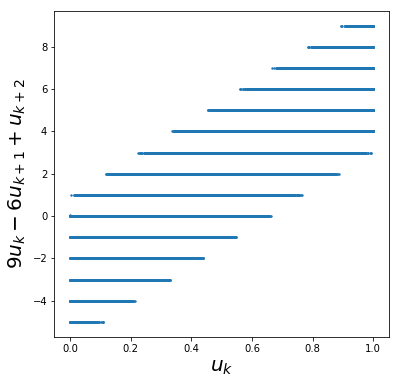

In [5]:
z = 9*U[:-2]-6*U[1:-1]+U[2:]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.scatter(U[:-2], z, s=2)

ax.set_xlabel(r'$u_k$', fontsize=20)
ax.set_ylabel(r'$9u_k-6u_{k+1}+u_{k+2}$', fontsize=20) 
plt.show()


An improvement is a Park and Miller LCG. It does exhibit the same obvious correlation among consecutive numbers.

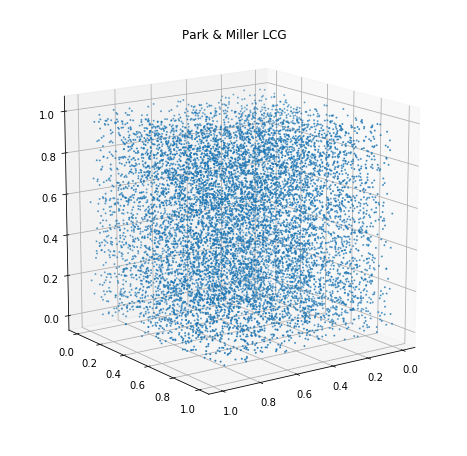

In [6]:
m = 2**31-1   # generate integers in  the range 0..(m-1)
a = 7**5      # multiplier
c = 0        # increment

k = 1969  # seed
N = 30000 # number of samples

# generate N samples U[0,1]
U = linearCongruentialRand(N,a,c,m,k)

# plot the random numbers in the unit cube
ax = plotResults(U)
ax.set_title('Park & Miller LCG');
plt.show()

Finally, we also have the built-in version of a randum number generator: rand.

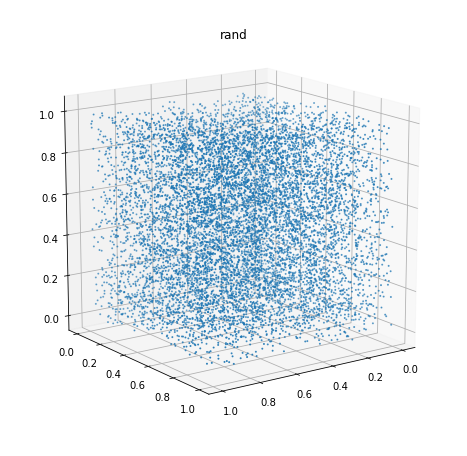

In [7]:
np.random.seed(123)
N = 30000
U = np.random.rand(N)

ax = plotResults(U)
ax.set_title('rand');
plt.show()

#### demo_lognormal_randomNumberGenerator: generate LN[mu,sigma] random numbers -- Lecture 3.2

Next we look at a random number generator for the lognormal distribution. These are generated by making use of the built-in randum number generator for Gaussian variables, randn.

In [8]:
mu    = 0.1
sigma = 0.4

M = 1000
N = 100

# simulate X ~ N(mu,sigma)
X = mu + sigma*np.random.randn(M,N)

# simulate LN[mu,sigma]
Y = np.exp(X)

In [9]:
# graphicalComparisonPdf was defined in Week 2
# I saved it to a module, and import the function. You can find the function definition on the github account or in Week 2.
from scipy.stats import lognorm
from custom_functions_iversity import graphicalComparisonPdf 

# As before, we define our own lognormal PDF function which works like MATLAB's implementation.
def lognpdf(x, mean, sig):
    return lognorm.pdf(x, scale = np.exp(mean), s = sig)

def modelPDF(x):
    return lognpdf(x, mu, sigma)

Comparing the generated values against the true PDF

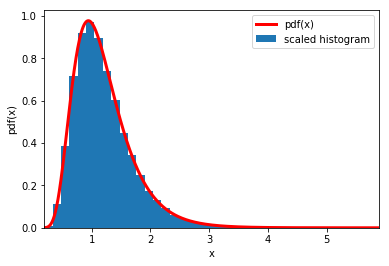

In [12]:
graphicalComparisonPdf(Y, modelPDF)
plt.show()

#### demo_Bernoulli_randomNumberGenerator: generate Bernoulli[p] random numbers -- lecture 3.3

The Bernoulli distribution can be found here: https://en.wikipedia.org/wiki/Bernoulli_distribution . It has a single free parameter, $0 < p < 1$. Simulating Bernoulli random variables is done using `rand`.

In [15]:
p = 0.8

M = 50
N = 10

# simulate U ~ U[0,1]
U = np.random.rand(M,N)

# simulate Bernoulli[mu,sigma]
xi = (U < p) # Note: xi is a boolean array.

Fraction of '0' and '1' over all samples.

In [16]:
f0 = np.mean(~xi, axis = 1) # mean number of 0's per sample.
f1 = np.mean(xi, axis = 1)  # ~ means negation.

Distribution of 0's and 1's visualized through a boxplot. The red line shows the true value of p and 1-p.

/home/vijay/miniconda3/envs/montecarloinfinance/lib/python2.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  


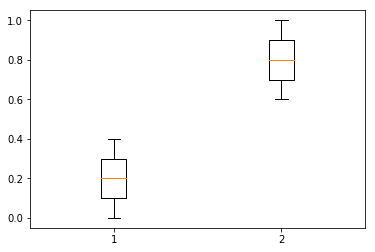

In [19]:
plt.figure()
plt.hold(True)
plt.boxplot([f0,f1], usermedians = [1-p, p]);
plt.show()

Now averaged over all samples:

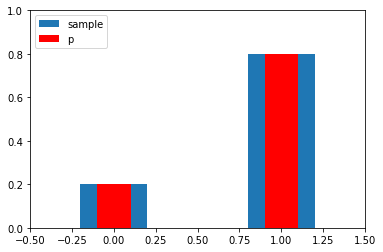

In [20]:
f_0_total = np.mean(f0)
f_1_total = np.mean(f1)
fig = plt.figure()
ax = fig.add_subplot(111)
p1 = ax.bar([0,1], [f_0_total, f_1_total], width = .4, align = 'center')
p2 = ax.bar([0,1], [1-p, p], width = .2, color='r', align = 'center')
ax.set_xbound(-.5,1.5)
ax.set_ybound(0,1)
ax.legend((p1[0],p2[0]),('sample','p'), loc = 'upper left');
plt.show()

#### demo_GaussianMixture2_randomNumberGenerator: generate GM[p,mu1,sigma1,mu2,sigma2] random numbers -- Lecture 3.4

Parameters for the generator

In [21]:
M = 1000
N = 100

p      =  0.7  # probability of Gaussian component 1
# Gaussian component 1
mu1    = -1.0
sigma1 =  1.0
# Gaussian component 2
mu2    =  4.0
sigma2 =  3.0

Simulate a matrix (M rows, N columns) of Bernoulli[p] random numbers

In [22]:
xi = (np.random.rand(M,N) < p)

Simulate a matrix (M rows, N columns) of GM[p,mu1,sigma1,mu2,sigma2] random numbers

In [23]:
from scipy.stats import norm
# # direct implementation
# X  = randn(M,N);       # X ~ N[0,1]
# Z  = xi.*(mu1+sigma1*X) + (1-xi).*(mu2+sigma2*X);

# preferred implementation
Z      = np.random.randn(M,N);
Z[xi]  = mu1+sigma1*Z[xi];
Z[~xi] = mu2+sigma2*Z[~xi];

We compare this to the true PDF of a Gaussian mixture. This PDF is defined by `GMpdf`

In [24]:
def GMpdf(x, p, mu, sigma):
    """
    Exact PDF of a Gaussian Mixture
    INPUT:
      x     : shape used for shape of output [MxN]
      p     : Probability vector  [Kx1]
      mu    : Vector of means     [Kx1]
      sigma : Vector of stdev's   [Kx1]

    OUTPUT:
      y : Value of the pdf [same size as x]  
    """
    
    # Compute pdf 
    y = np.zeros_like(x, dtype = np.float);
    for k in range(len(p)):
        y = y + p[k]*norm.pdf(x,mu[k],sigma[k])
    return y


And the final visualization

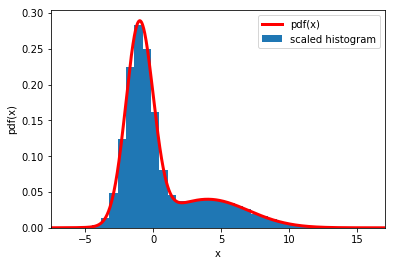

In [25]:
def modelPDF(x):
    return GMpdf(x, [p, 1-p], [mu1, mu2], [sigma1, sigma2])

graphicalComparisonPdf(Z, modelPDF)
plt.show()

#### demo_categorical_randomNumberGenerator: generate Categorical[p,K] random numbers -- Lecture 3.5

Parameters for the Categorical distributon

In [26]:
p = np.ones(6,dtype=np.float) # The demo looks at 6 possible outcomes (a die), with equal probabilities.
p[1] += 1                     # Here we consider one outcome to be slightly more probable. -- a weighted die
p /= p.sum()   # normalize
K = p.size

In [27]:
cum_p = np.cumsum(np.r_[0,p])    # cumulative distribution

U = np.random.rand()                 # simulate U ~ U[0,1]

xi = np.sum(U > cum_p)     # xi ~ Categorical[p,K], so it takes on K different values with probability p[i] for the i'th element

Defining the random number generator for categorical variables

In [28]:
def categoricalRand(M, N, p):
    """
    Random number generator for categorical variables.
    
    INPUT:
    M : size of sample
    N : number of samples
    p : array of (normalized) probabilities for categorical variables
    
    OUTPUT:
    
    k : N samples of size M (MxN array) of randomly drawn categorical variables. k takes values between 1 and the size of p.
    
    """
    p = np.cumsum(np.r_[0, p])

    # Sample from U[0,1]
    k = np.random.rand(M,N)
    # Sample from Categorical[p,K]
    k = np.sum(k[:,:,np.newaxis] > p, axis = 2)
    return k.astype(np.int)

We use this to generate some samples

In [29]:
M = 100
N = 20

xi = categoricalRand(M, N, p) # generate N samples of size M through our custom 
frequency = np.mean( xi[:,:,np.newaxis] == np.arange(1, K+1,dtype=np.int), axis = (0,1) ) # relative frequency of each outcome.

Plot the drawn samples vs the true probabilities

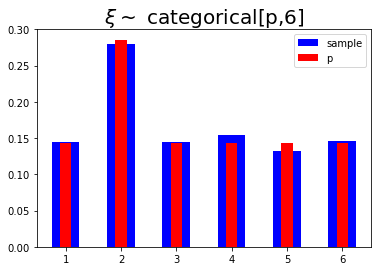

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
p1 = ax.bar(np.unique(xi), frequency, width = .5, color='b', align = 'center')
p2 = ax.bar(range(1,p.size+1), p, width = .2, color='r', align = 'center')
ax.set_title(r'$\xi \sim$ categorical[p,6]', fontsize = 20)
ax.legend((p1[0],p2[0]),('sample','p'), loc = 'upper right');
plt.show()

#### demo_GaussianMixtureK_randomNumberGenerator: generate GM[p,mu,sigma] random numbers -- Lecture 3.6

Gaussian components.

In [31]:
M = 1000
N = 100


p     = np.array([ 1/2., 1/3.,  1/6.])  # probability vector
mu    = np.array([ -1.0,  4.0,  12.0])  # means
sigma = np.array([  1.0,  3.0,  0.5 ])  # standard deviations

Simulate a matrix (M rows, N columns) of Categorical[p,K]

In [32]:
xi = categoricalRand(M,N,p) - 1   # xi ~ Categorical[p,K]. 
# We subtract 1 from xi, such that the lowest value of xi is 0 (we use xi for indexing, and indexing starts at 0)

Simulate a matrix (M rows, N columns) of GM[p,mu,sigma] random numbers

In [34]:
X  = np.random.randn(M,N)
Z = mu[xi] + sigma[xi] * X

Compare exact PDF with simulation of mixed Gaussians

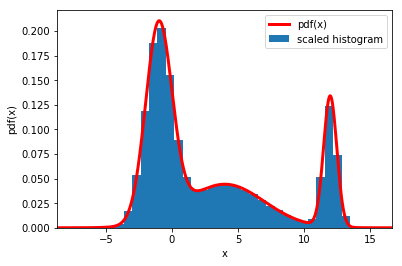

In [35]:
def modelPdf(z):
    return GMpdf(z, p, mu, sigma)
graphicalComparisonPdf(Z, modelPdf)
plt.show()

#### demo_exponential_randomNumberGenerator: generate Exp[lambda] random numbers -- Lecture 3.7

Here we look at the inverse method ( https://en.wikipedia.org/wiki/Inverse_transform_sampling_method )

and apply it to the exponential distribution ( https://en.wikipedia.org/wiki/Exponential_distribution ).

In the inverse method we draw samples from a uniform distribution, $[0,1]$, and use the (known) inverse of the CDF to construct the PDF of a distribution.


In [36]:
lda = 10 # Parameter for exponential distribution. lda = lambda

Simulate a matrix (`M` rows, `N` columns) of `Exp[lda]` random numbers.

$X\sim \lambda e^{-\lambda x}$

The inverse of the CDF is given by ($p\in [0,1]$)

$\textrm{invcdf}(p) = -\log(1-p)/\lambda$

In [37]:
M = 100
N = 1000

U = np.random.rand(M,N)      # U ~ U[0,1]. 
X = -np.log(U)/lda           # inverse method: X ~ Exp[lambda]

X now holds samples drawn from the exponential distribution, but generated through the inverse method. We compare this to the true PDF.

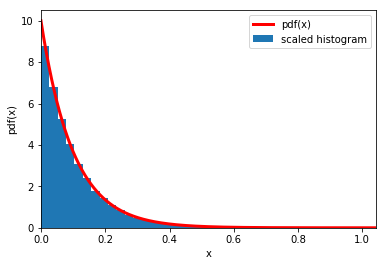

In [38]:
def modelPDF(x):
    return lda * np.exp(-lda * x)
graphicalComparisonPdf(X, modelPDF)
plt.show()

#### demo_PoissonProcess: generate times of events in homogeneous Poisson process -- Lecture 3.8

Next we simulate a homogeneous Poisson process: https://en.wikipedia.org/wiki/Poisson_process
Parameters

In [39]:
eta = 10         # average of 10 events per unit time (note that lambda cannot be used as a variable in Python)
M = 4            # Simulate M times
tauMax = 20/eta  # Maximum length for the simulation
tau = np.zeros((M, eta), dtype = np.float)

Here we use lists instead of numpy arrays, because the final length of tau is not known beforehand.

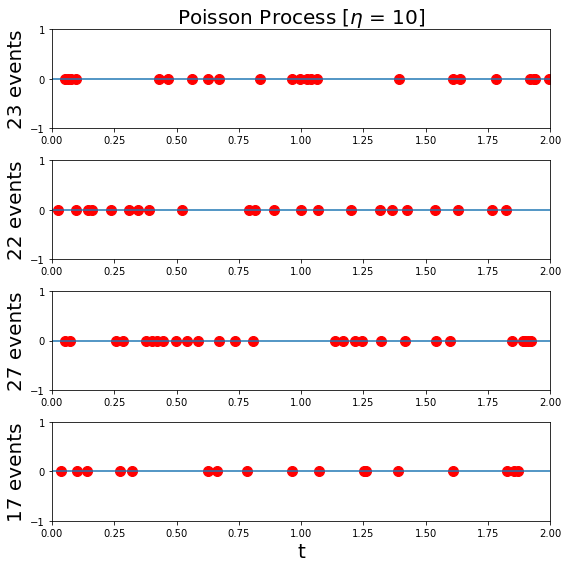

In [40]:
np.random.seed(20)
fig = plt.figure(figsize = (8,8))
for m in range(M):
    tau = [-np.log(np.random.rand())/eta]
    nEvent = 0;
    while(tau[-1] < tauMax):
        nEvent = nEvent+1  # new event
        delay_event = -np.log(np.random.rand())/eta           # delay ~Exp[lambda]
        tau.append(tau[nEvent-1] + delay_event)  # time for new event
    tau = np.asarray(tau)
    tau = tau[tau < tauMax] # possible exclude the last event, if it is longer than tauMax
    
    ### Visualization
    
    ind = '{}1{}'.format(M,m+1) 
    ax = fig.add_subplot(ind)
    ax.plot([0, 2], [0,0])
    ax.scatter(tau,np.zeros_like(tau), c='red',marker='o', s=100)
    if m==0: ax.set_title('Poisson Process [$\eta$ = {}]'.format(eta), fontsize = 20)
    if m==M-1: ax.set_xlabel('t', fontsize=20)
    ax.set_xbound(0,2)
    ax.set_ybound(-1,1)
    ax.set_yticks([-1,0,1])
    ax.set_ylabel(str(tau.size) +' events', fontsize=20)
plt.tight_layout()
plt.show()

#### demo_rejectionSampling: illustrate rejection sampling

Target distribution

In [41]:
p      = [1/2., 1/3., 1/6.]
mu     = [-1.0,  4.0, 12.0]
sigma  = [ 1.0,  3.0,  0.5]
def f_Y(x): 
    return GMpdf(x,p,mu,sigma)

Origin distribution

In [42]:
mu0    = 4
sigma0 = 8
def f_X(x):
    return norm.pdf(x, mu0, sigma0)
def rndX(shape = None):
    if shape is None:
        return mu0+sigma0*np.random.randn()
    else:
        return mu0+sigma0*np.random.randn(*shape)

Scale f_X so that if covers f_Y

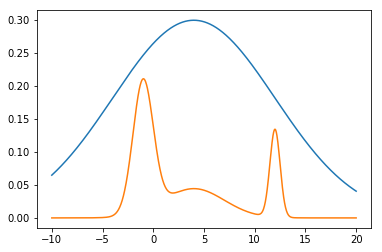

In [43]:
A = 6
nPlot  = 1000
xPlot  = np.linspace(-10,20,nPlot)
plt.figure()
plt.plot(xPlot,A*f_X(xPlot),xPlot,f_Y(xPlot));
plt.show()

Now we draw samples from the origin distribution, rndX, and use a decision criteria to accept or reject these samples. The result is an array with samples drawn from f_Y.

In [48]:
def rejectionSampling(M,N,f_X,f_Y,A,rndX):
    """
    Sampling from a univariate distribution by rejection sampling.
    
    This implementation is a little different from the matlab code,
    because the ordinary while loop takes too long.

    INPUT:

        M,N : Number of rows and columns
        f_X : Handle of origin pdf
        f_Y : Handle of target pdf
          A : Scale factor
       rndX : Handle of a function that generates X ~ f_X

    OUTPUT:
          Y : Sample of size [M x N] from the distribution f_Y. 
    """
    sampleLength = M*N;
    Y = np.zeros((sampleLength,)) # elements of Y are 
    remainingLength = sampleLength
    i = 0
    while (remainingLength > 0):
        sample = rndX((remainingLength,)) # generate as many samples as remaining unfilled elements in Y.
        fx = A*f_X(sample)
        fy = f_Y(sample)
        
        if np.any(fx < fy):
            raise ValueError('A*f_X is not a valid envelope for f_Y')
        
        # If the u ~ U[0,fx] is below fy, accept corresponding sample. If not, reject sample.
        u  = fx*np.random.rand(remainingLength)
        accepted = sample[u < fy]
        Y[i:i+accepted.size] = accepted
        i = i+accepted.size
        remainingLength = sampleLength - i 
    return Y.reshape(M, N)


Here we visualize this function against the true PDF.

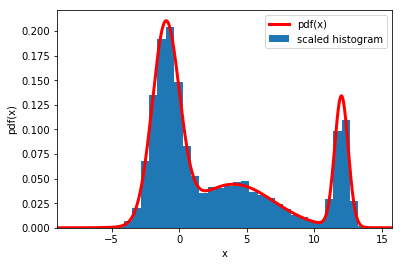

In [49]:
M = 10
N = 1000

Y = rejectionSampling(M,N,f_X,f_Y,A,rndX)

graphicalComparisonPdf(Y,f_Y)
plt.show()

#### demo_rejectionSamplingCircle: Generates uniformly distributed points in -- Lecture 3.9

This demo demonstrates how we can use rejection sampling to determine the volume of a hypersphere.

In [50]:
def demo_rejectionSamplingCircle(D, r, N):
    """Generates uniformly distributed points in
    a ball of any dimension and performs a Monte Carlo estimate of the volume

    INPUT:
        D  : Dimension of the ball
        r  : Radius of the ball
        N  : Number of sample points 

    OUTPUT:
        X  : [N,D] matrix with the sample points
        a  : estimated volume of the ball
    """
    def _norm(X):
        return np.sqrt( np.sum(X**2, axis = 1) )
    X = np.zeros((N,D))
    nAccept = 0
    nTotal = 0
    i = 0
    while (nAccept < N):
        Y = 2* np.random.rand(N - nAccept, D)-1; # Generate [(N - nAccept) x D] independent uniforms U[-1,1]
        accepted = Y[_norm(Y) < 1,:]            # If norm < 1 accept, else discard
        nAccept = nAccept + accepted.shape[0]   # update number of accepted variables
        X[i:i+accepted.shape[0],:] = accepted   # add accepted variables to array X
        nTotal = nTotal + Y.size                # update total number of generated samples
        
    a = (2*r)**D * nAccept / nTotal  # Area calculation ((2r)^D to normalize to the hypercube volume)
    X = r * X                        # Scale to the proper radius
    return a, X

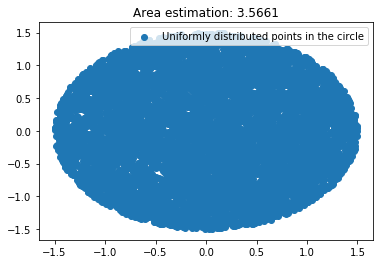

In [51]:
D = 2
r = 1.5
N = 10000

a, X = demo_rejectionSamplingCircle(D, r, N);
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X.T[0],X.T[1], label = 'Uniformly distributed points in the circle')
ax.legend(loc = 'upper right')
ax.set_title('Area estimation: {:.4f}'.format(a));
plt.show()